# 📂 1. Environment Setup

In [1]:
!pip install realesrgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 k

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os


# Task 4: AI-Based Image Upscaling
**Objective**: Implement AI-based image upscaling to enlarge an image by 4x while maintaining the highest clarity.

---


In [3]:
!pip install torchvision==0.16.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [4]:
!pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is 

##Traditional Upscaling (Nearest + Bicubict)

In [1]:
def upscale_traditional(img_path, scale=4):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    new_size = (w * scale, h * scale)

    nearest = cv2.resize(img, new_size, interpolation=cv2.INTER_NEAREST)
    bicubic = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)

    cv2.imwrite("nearest_x4.jpg", nearest)
    cv2.imwrite("bicubic_x4.jpg", bicubic)
    print("[✓] Saved Nearest and Bicubic Upscaled Images.")
    return nearest, bicubic

##  Real-ESRGAN Upscaling

In [2]:
def upscale_real_esrgan(img_path):
    from realesrgan import RealESRGAN


    # Load the image
    img = Image.open(img_path).convert("RGB")

    # Load ESRGAN model
    model = RealESRGAN.from_pretrained('RealESRGAN_x4plus')  # 4x upscale model
    model.eval()

    # Upscale
    with torch.no_grad():
        sr_img = model(img)

    sr_img.save("real_esrgan_x4.jpg")
    print("[✓] Saved Real-ESRGAN Upscaled Image.")
    return sr_img

## Comparison Result

In [3]:
def show_comparison(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if isinstance(img, np.ndarray):
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

[✓] Saved Nearest and Bicubic Upscaled Images.


/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


❌ Real-ESRGAN failed: cannot import name 'RealESRGAN' from 'realesrgan' (/usr/local/lib/python3.11/dist-packages/realesrgan/__init__.py)


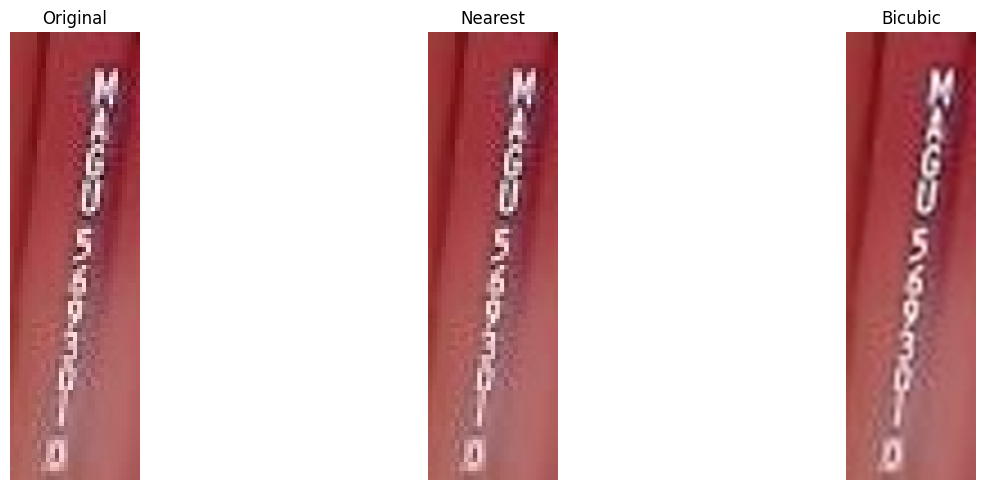

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = '/content/task4_img.jpg'  # Replace with your full path if needed

nearest_img, bicubic_img = upscale_traditional(image_path)
try:
    import torch
    sr_img = upscale_real_esrgan(image_path)
except Exception as e:
    sr_img = None
    print("Real-ESRGAN failed:", e)

# Show all results
images = [cv2.imread(image_path), nearest_img, bicubic_img]
titles = ['Original', 'Nearest', 'Bicubic']

if sr_img:
    images.append(sr_img)
    titles.append('Real-ESRGAN')

show_comparison(images, titles)


In [5]:
#  Real-ESRGAN Super Resolution
# Step 1: Clone the repo and install dependencies
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
!pip install -r requirements.txt
!python setup.py develop

# Step 2: Download Pre-trained Model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P weights



fatal: destination path 'Real-ESRGAN' already exists and is not an empty directory.
/content/Real-ESRGAN
/usr/local/lib/python3.11/dist-packages/setuptools/__init__.py:94: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.11/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        sta

In [8]:
# Step 3: Upload your image
from google.colab import files
uploaded = files.upload()

# Step 4: Run Super Resolution
!python inference_realesrgan.py -n RealESRGAN_x4plus -i task4_img.jpg --outscale 4 --fp32


Saving task4_img.jpg to task4_img.jpg
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
Testing 0 task4_img


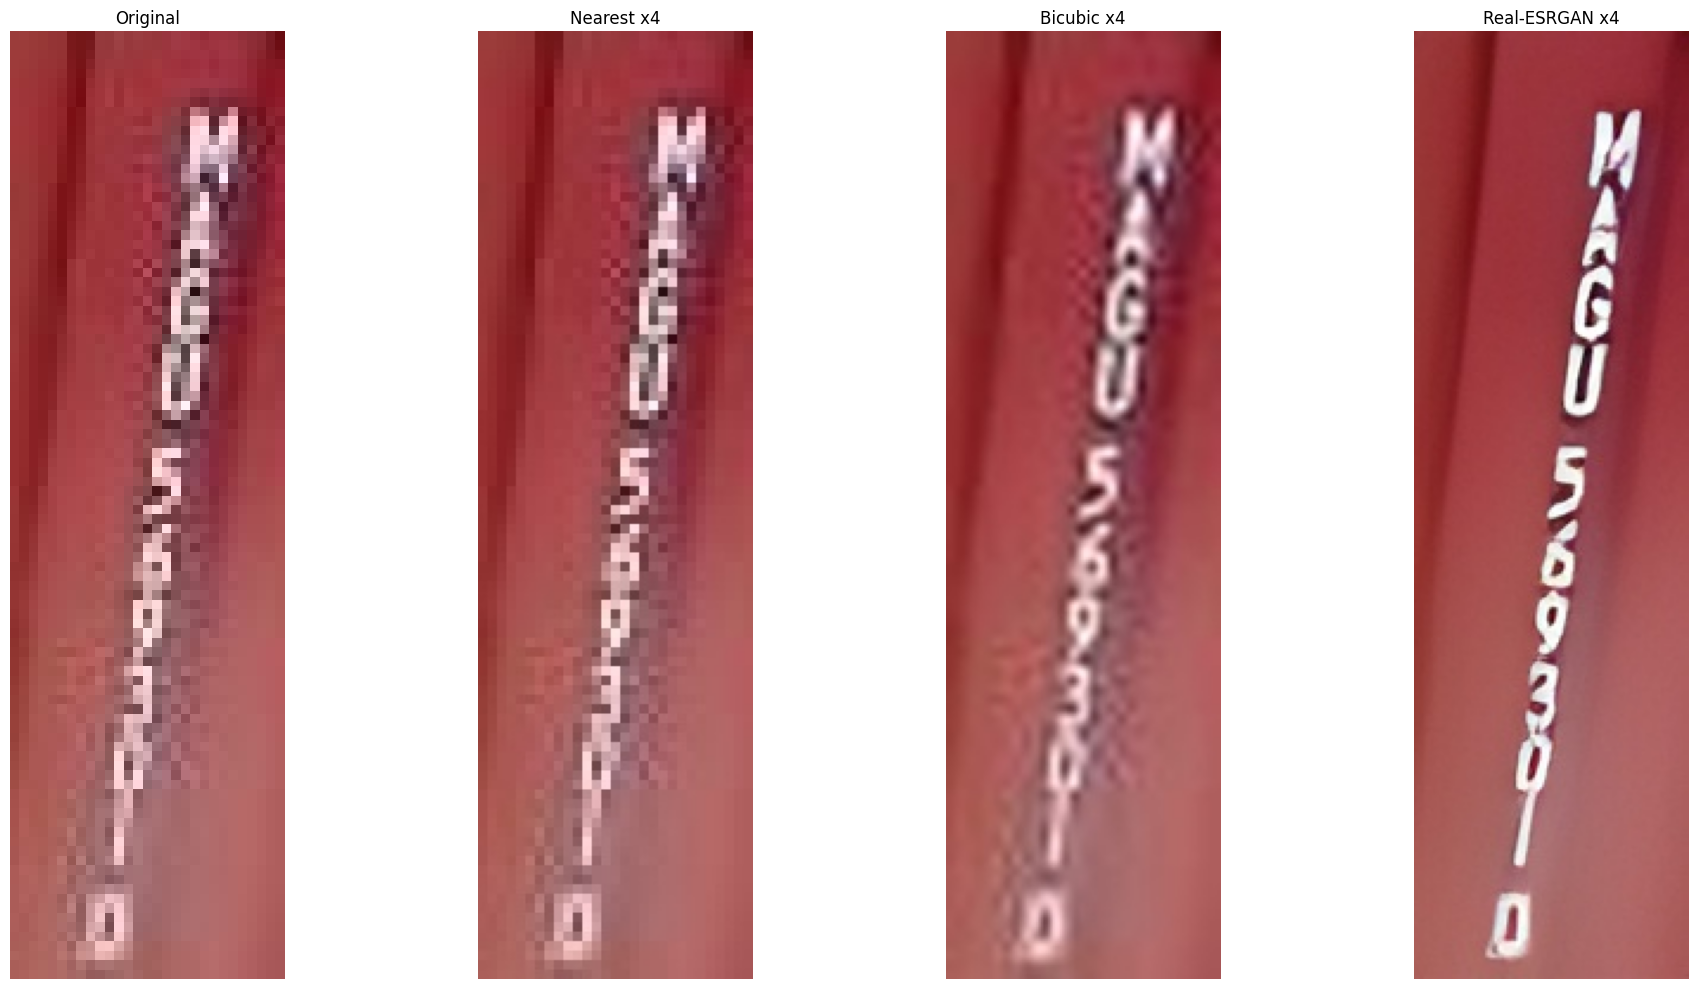

In [15]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load images
original = cv2.imread("/content/task4_img.jpg")
nearest = cv2.imread("/content/nearest_x4.jpg")
bicubic = cv2.imread("/content/bicubic_x4.jpg")
esrgan = Image.open("/content/Real-ESRGAN/results/task4_img_out.jpg")

# Convert BGR to RGB
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
nearest = cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB)
bicubic = cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB)

# Plot
titles = ["Original", "Nearest x4", "Bicubic x4", "Real-ESRGAN x4"]
images = [original, nearest, bicubic, esrgan]

plt.figure(figsize=(20, 10))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
